# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Perceptron Class

In [2]:
class Perceptron(object):
#----------------------------------------------------------Plot Result----------------------------------------------------------------------
  def Plotpoly(self,weight):
    delta = 0.01
    xrange = np.arange(-2.0, 8.0, delta)
    yrange = np.arange(-2.0, 8.0, delta)
    x, y = np.meshgrid(xrange, yrange)
    equation = weight[1]*x + weight[2]*y + weight[0]
    return equation, x, y

#------------------------------------------Predict data during test phase (after training)---------------------------------------------------
  def TestPredict(self,x,y,label,weight):
    errors=0
    predict=0
    for i in range(len(x)):
      ac=x[i]*weight[1]+y[i]*weight[2] + weight[0]                              #create separation line by given coefficient
      if ac>=0.0:
        predict=1
      elif ac<0.0:
        predict=0
      errors += int(label[i]-predict != 0.0)                                    #find the number of errors
    return errors

#-------------------------------------------------Predict data during training phase---------------------------------------------------
  def TrainPredict(self,eta,x,y,label,weight):
    errors=0
    for i in range(len(x)):
      ac=x[i]*weight[1]+y[i]*weight[2] + weight[0]                              #create separation line by given coefficient
      if ac>=0.0:
        predict=1
      elif ac<0.0:
        predict=0
      update = eta * (label[i]-predict)                                         #update weights after each prediction
      weight[1] += update * x[i]
      weight[2] += update * y[i]
      weight[0] += update
      errors += int(update != 0.0)                                              #find the number of errors
    return errors,weight

#---------------------------------------------------------- training phase---------------------------------------------------------------
  def fit(self,eta,Epoch,x,y,label,x2,y2,label2):
    weight = [random.uniform(-4.0, 4.0) for _ in range(3)]                      #Initialize weights
    errorsTR = []
    errorsTS = []
    Train_errors=0
    Test_errors=0
    df = pd.DataFrame(data={'x': x, 'y': y, 'label': label})
    x = np.linspace(-3,8)
    for _ in range(Epoch):                                                      #Epoch is the number of training iteration. In each iteration we show all of the
      errorsTR.append(Train_errors)                                             #inputs and its lable to the network and based on its response we modify its weights.
      errorsTS.append(Test_errors)
      Train_errors=0
      Test_errors=0
      sns.lmplot(x='x', y='y', data=df, hue='label')                            #Plot inputs
      eq, x, y=self.Plotpoly(weight)                                            #based on the weights, we find its formula to plot
      plt.contour(x, y, eq, [0])
      plt.grid()
      plt.show()
      Test_errors= self.TestPredict(x2,y2,label2,weight)                        #find the erros of prediction on Test data
      Train_errors,weight=self.TrainPredict(eta,x1,y1,label,weight)             #find the erros of prediction on Train data and modify its weights

    fig, axs = plt.subplots(1,2)                                                #Plot the changes of error during the training phase
    fig.suptitle('Train Error Rate In Each Epoch')
    axs[0].plot(errorsTR)
    axs[0].set_title('Evaluation Error')
    axs[1].plot(errorsTS)
    axs[1].set_title('Test Error Error')


# Prepare dataset

One of the most important steps in training a neural network is data preprocessing. In this phase, we prepare the data to optimize the training process.

First, we should shuffle the dataset, which involves randomly reordering all the data samples. This helps improve the training process by preventing the model from learning patterns based on the order of the data, such as having samples with the same label grouped together.

Next, we need to split the dataset into training and testing subsets. This split is necessary so that some data can be used to train the model (where the labels are provided), while the remaining data is reserved for testing. It's important that the model is evaluated on data it hasn’t seen during training to ensure it generalizes well to new, unseen data.

In [3]:
csv_data = pd.read_csv("source/dataset1.csv")                                   #Read dataset from directory
data_partial1 = pd.DataFrame(csv_data, columns=['x', 'y', 'label'])             #assigne lable to each column
data_partial = data_partial1.iloc[np.random.permutation(len(data_partial1))]    #shuffle dataset(This function reorders data with the aim of increasing network performance.)
Lim=round(len(data_partial)*0.8)                                                #find the boundary to seperate dataset in 2 part (train and test)
Train_Data=data_partial.iloc[:Lim,:];                                           #seperate dataset
Test_Data=data_partial.iloc[Lim:,:];

# Data Visualization

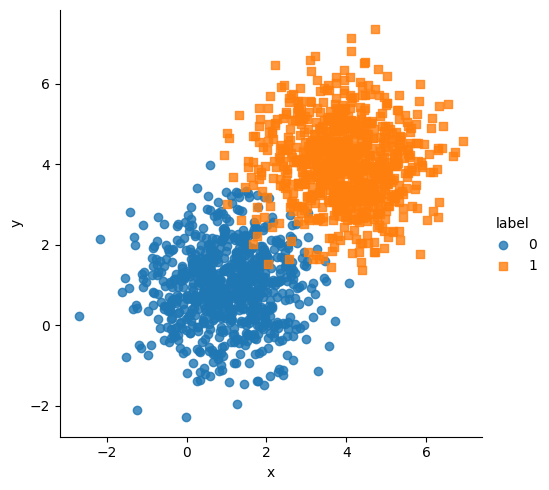

In [4]:
sns.lmplot(x='x', y='y', data=Train_Data, hue='label', fit_reg=False, markers=["o", "s"])

# Prepare dataset for training phase

In [5]:
x1 = Train_Data.iloc[:, 0].values
y1 = Train_Data.iloc[:, 1].values
label = Train_Data.iloc[:, 2].values
#label = np.where(label == 0, -1, 1)

In [6]:
x2 = Test_Data.iloc[:, 0].values
y2 = Test_Data.iloc[:, 1].values
label2 = Test_Data.iloc[:, 2].values
#label2 = np.where(label2 == 0, -1, 1)

# Create a Perceptron neuron and train it

In [7]:
model=Perceptron()

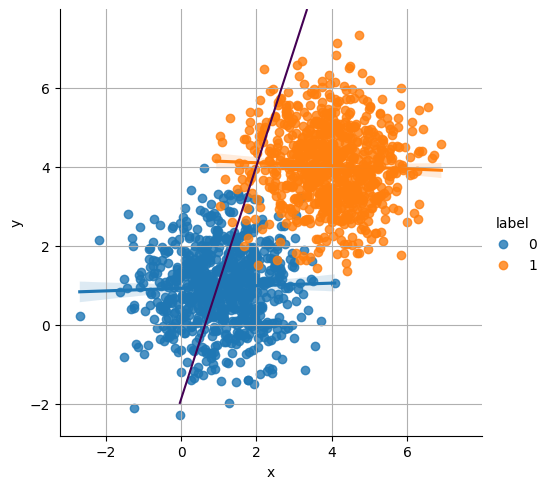

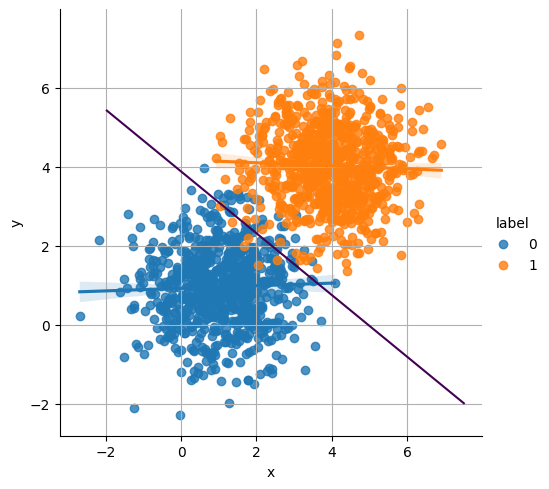

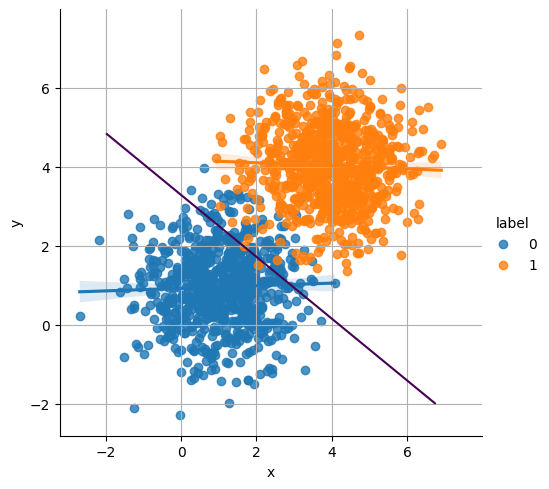

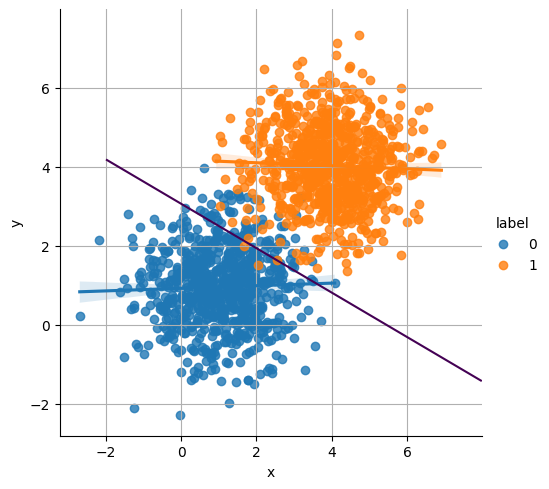

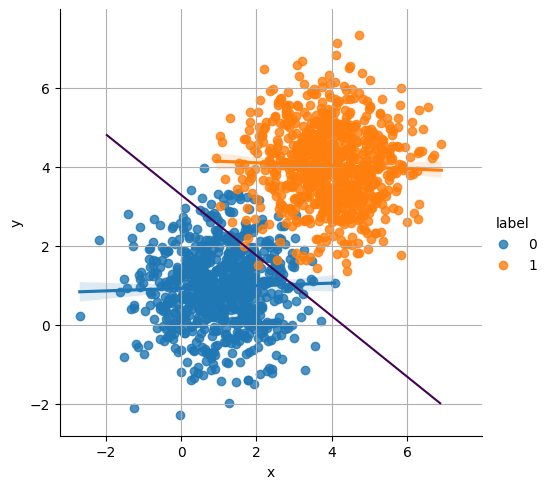

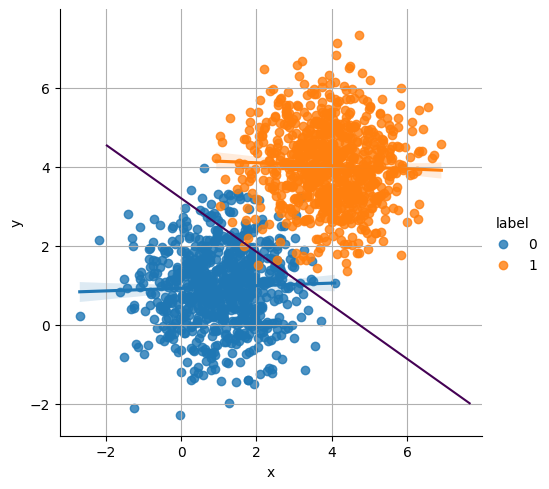

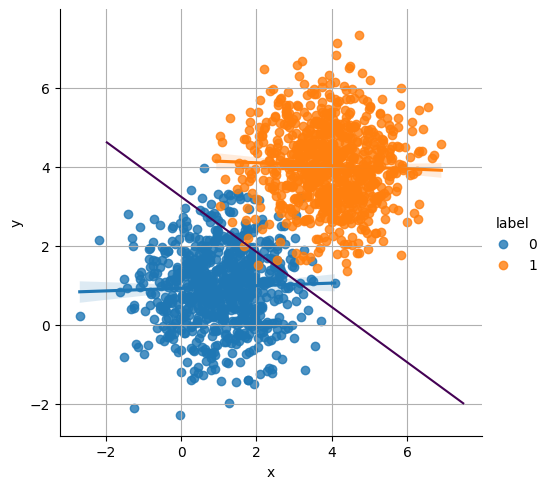

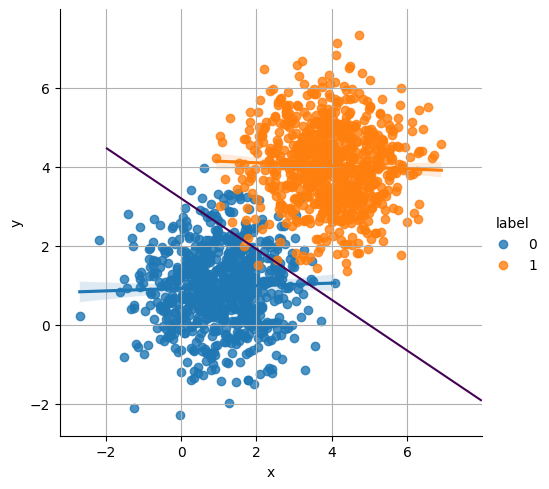

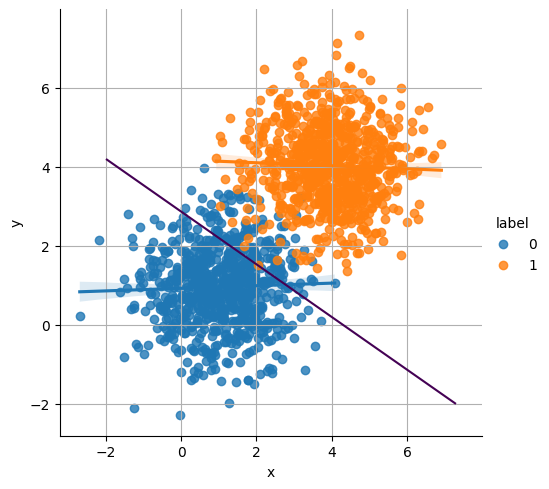

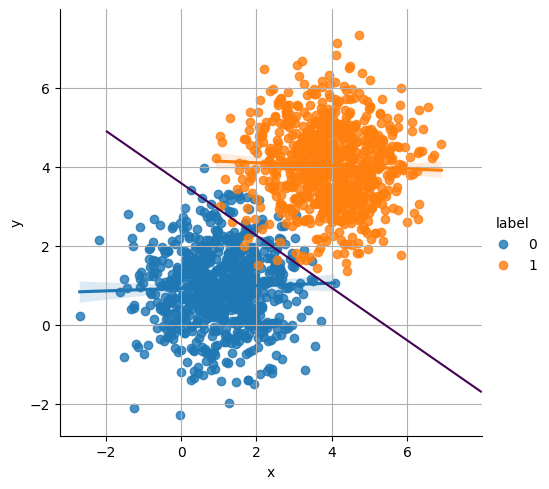

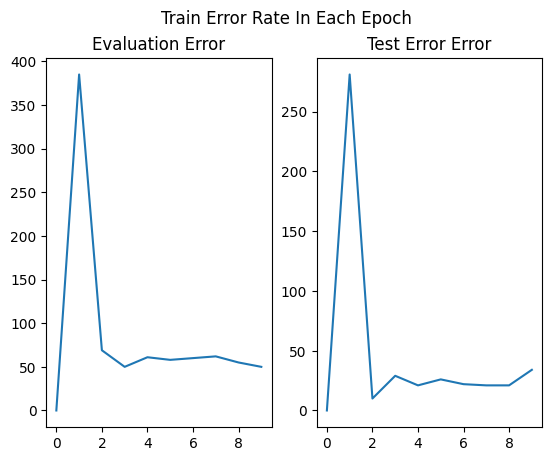

In [8]:
model.fit(0.01,10,x1,y1,label,x2,y2,label2)